<a href="https://colab.research.google.com/github/NagmanovRay/Sales-Data-Analysis-with-AI/blob/main/Sales_Data_Analysis_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Sales Data Analysis***

---



In my Sales Data Analysis project, I'm diving into a big dataset filled with sales info. It covers everything from when sales happened to who bought what and where they're from. I'll be using Python in Google Colab to dig into this data and find useful stuff. My goal? To spot trends, understand what sells best, and figure out how to make more money. This project shows how digging into numbers can help businesses grow smarter.

---
In this project, I utilized ChatGPT and AI to engineer prompts and create code for data analysis, demonstrating the power of AI-driven assistance in generating insights and solutions. Through the collaborative efforts of human expertise and AI capabilities, we explored sales trends, delved into customer demographics, optimized sales and pricing strategies, and informed critical business decisions.

By leveraging the capabilities of ChatGPT, we efficiently formulated code for exploratory data analysis, predictive modeling, and visualization tasks, streamlining the process of extracting actionable insights from complex datasets. This approach not only accelerated the analysis process but also enabled the synthesis of comprehensive conclusions and recommendations based on the project goals.

The integration of AI-driven prompt engineering with human expertise exemplifies the synergy between human creativity and AI automation, empowering businesses to unlock valuable insights and drive informed decision-making. As we continue to harness the capabilities of AI in data analysis and beyond, we pave the way for enhanced efficiency, innovation, and strategic agility in addressing complex business challenges.


---




Goals of the project:


*   Explore Trends
*   Understand Customer Demographics
*   Optimize Sales Strategies
*   Enhance Pricing Strategies
*   Inform Business Decisions







In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
retail_data = pd.read_csv("sales_data.csv")
retail_data

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


Let's remove column "Column1" since it does not contain anything.

In [30]:
retail_data.drop(columns=['Column1'], inplace=True)
print(retail_data.head())

   index       Date    Year     Month  Customer Age Customer Gender  \
0      0  2/19/2016  2016.0  February          29.0               F   
1      1  2/20/2016  2016.0  February          29.0               F   
2      2  2/27/2016  2016.0  February          29.0               F   
3      3  3/12/2016  2016.0     March          29.0               F   
4      4  3/12/2016  2016.0     March          29.0               F   

         Country       State Product Category     Sub Category  Quantity  \
0  United States  Washington      Accessories  Tires and Tubes       1.0   
1  United States  Washington         Clothing           Gloves       2.0   
2  United States  Washington      Accessories  Tires and Tubes       3.0   
3  United States  Washington      Accessories  Tires and Tubes       2.0   
4  United States  Washington      Accessories  Tires and Tubes       3.0   

   Unit Cost  Unit Price   Cost  Revenue  
0      80.00  109.000000   80.0    109.0  
1      24.50   28.500000   49.



---


Let's create individual bar charts for each product category, displaying the total revenue generated by each category.

---



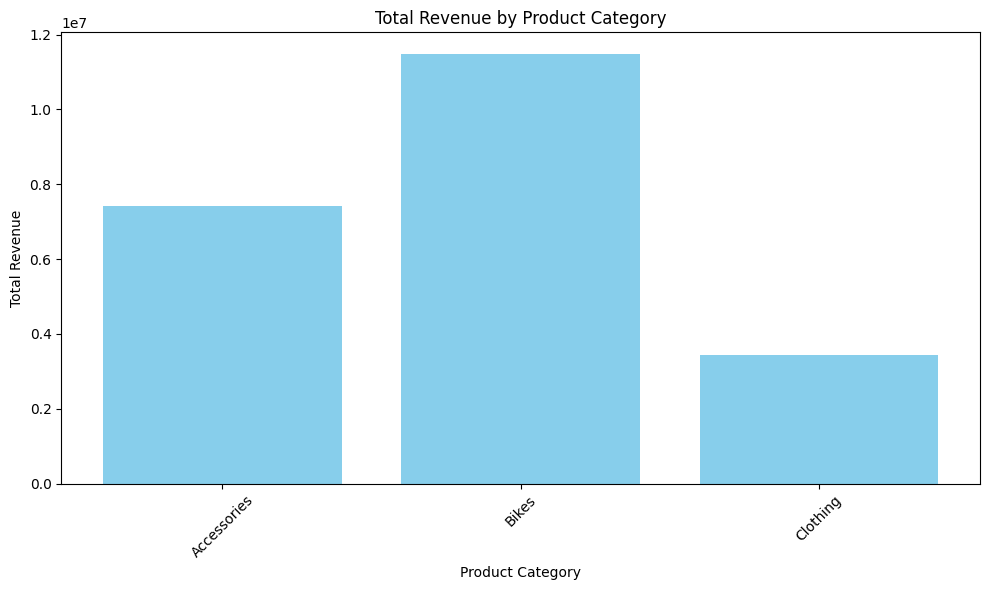

In [31]:
category_revenue = retail_data.groupby('Product Category')['Revenue'].sum().reset_index()

# Plot bar charts for each category and revenue
plt.figure(figsize=(10, 6))
plt.bar(category_revenue['Product Category'], category_revenue['Revenue'], color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---


Bikes generate the highest revenue, while the clothing category contributes the least.


---

Now let's see what subcategory of product is responsible for this.:

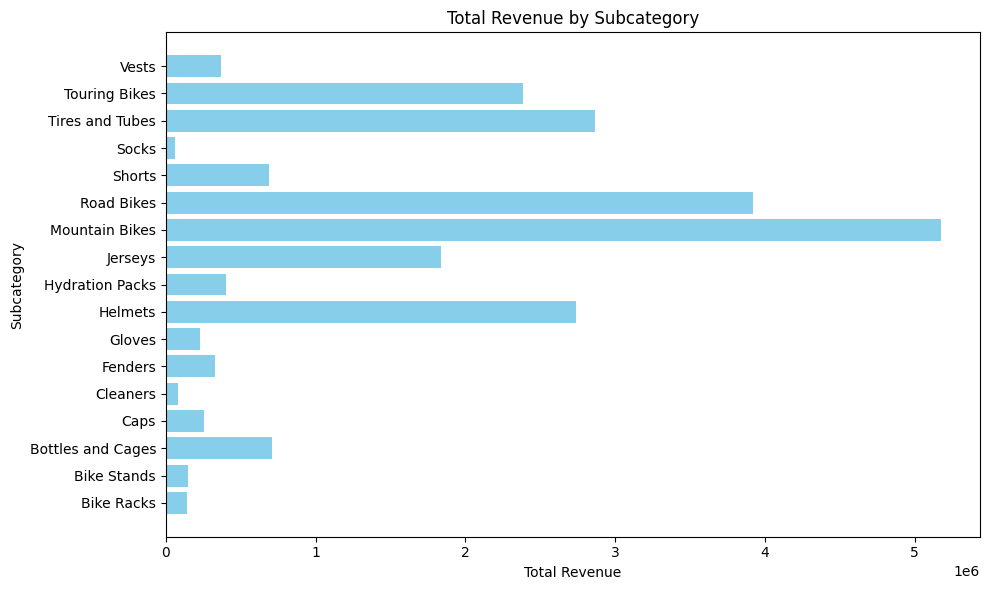

In [38]:
subcategory_revenue = retail_data.groupby('Sub Category')['Revenue'].sum()

# Plot bar chart for each subcategory and revenue
plt.figure(figsize=(10, 6))
plt.barh(subcategory_revenue.index, subcategory_revenue.values, color='skyblue')
plt.title('Total Revenue by Subcategory')
plt.xlabel('Total Revenue')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()



---


We can see that Road Bike and Mountain Bikes generate highest revenue, following by Helmets, Tires and Tubes and Touring Bikes.


---

Let's see how many units of each product has been sold.

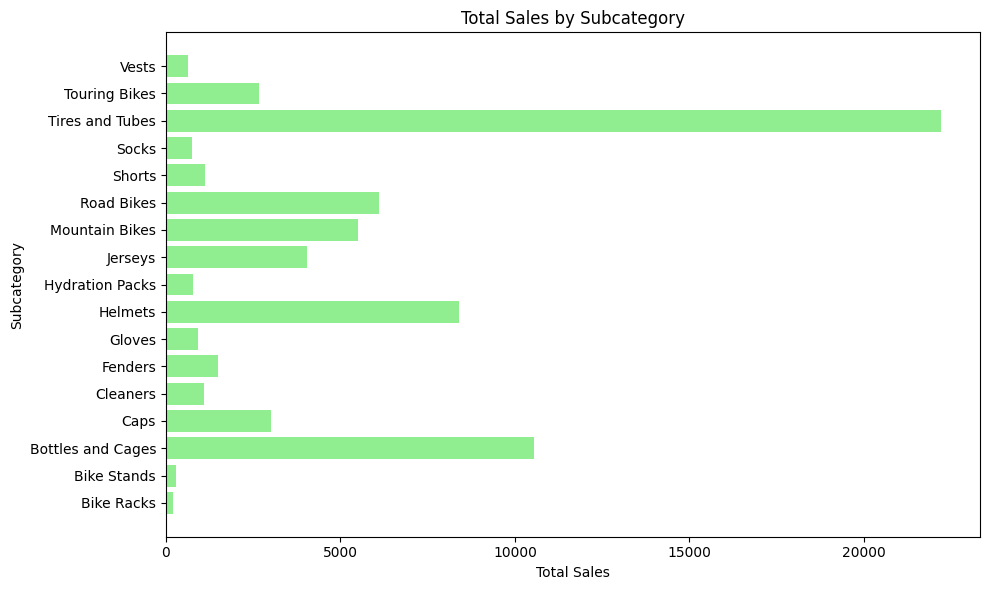

In [39]:
# Group the DataFrame by the subcategory column and calculate total quantity sold
subcategory_sales = retail_data.groupby('Sub Category')['Quantity'].sum()

# Plot bar chart for each subcategory and quantity sold
plt.figure(figsize=(10, 6))
plt.barh(subcategory_sales.index, subcategory_sales.values, color='lightgreen')
plt.title('Total Sales by Subcategory')
plt.xlabel('Total Sales')
plt.ylabel('Subcategory')
plt.tight_layout()
plt.show()



---


Interestingly, Tires and Tubes are the top-selling products, yet they rank third in revenue generation. This can be attributed to the higher unit cost of bikes, resulting in a larger profit margin compared to products with lower margins.


---



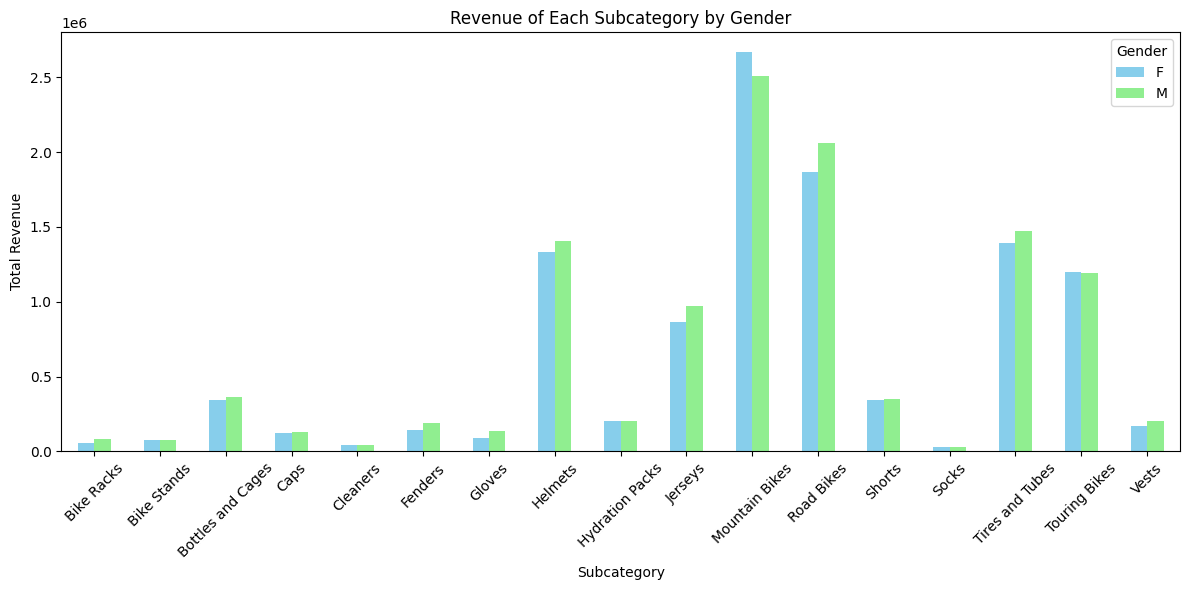

In [42]:
# Group the DataFrame by subcategory and gender, then calculate total revenue
subcategory_gender_revenue = retail_data.groupby(['Sub Category', 'Customer Gender'])['Revenue'].sum().unstack()

# Plot grouped bar chart for revenue of each subcategory by gender
plt.figure(figsize=(12, 6))
subcategory_gender_revenue.plot(kind='bar', stacked=False, ax=plt.gca(), color=['skyblue', 'lightgreen'])
plt.title('Revenue of Each Subcategory by Gender')
plt.xlabel('Subcategory')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()



---
We observe that there isn't a significant difference in purchasing behavior between genders. Both genders contribute similarly to the revenue across various subcategories, suggesting that product preferences may not be strongly influenced by gender.

---

Now let's see the quantity of sales and the revenue generated from it.


In [43]:
# Group the DataFrame by subcategory and calculate total sales and revenue
subcategory_summary = retail_data.groupby('Sub Category').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

# Rename the columns for clarity
subcategory_summary.columns = ['Subcategory', 'Total Sales', 'Total Revenue']

# Display the DataFrame
print(subcategory_summary)

          Subcategory  Total Sales  Total Revenue
0          Bike Racks        204.0       140854.0
1         Bike Stands        304.0       150911.0
2   Bottles and Cages      10558.0       709407.0
3                Caps       3020.0       255992.0
4            Cleaners       1102.0        82887.0
5             Fenders       1494.0       329204.0
6              Gloves        913.0       228353.0
7             Helmets       8387.0      2738210.0
8     Hydration Packs        786.0       403276.0
9             Jerseys       4033.0      1834110.0
10     Mountain Bikes       5499.0      5176456.0
11         Road Bikes       6119.0      3921989.0
12             Shorts       1129.0       689184.0
13              Socks        750.0        61237.0
14    Tires and Tubes      22213.0      2865915.0
15      Touring Bikes       2673.0      2387910.0
16              Vests        636.0       368681.0




---


This table provides a breakdown of total sales and revenue for various subcategories of products. Each row represents a different product subcategory, and the columns provide the following information.


---

Let's examine how various age groups contribute to revenue outcomes.




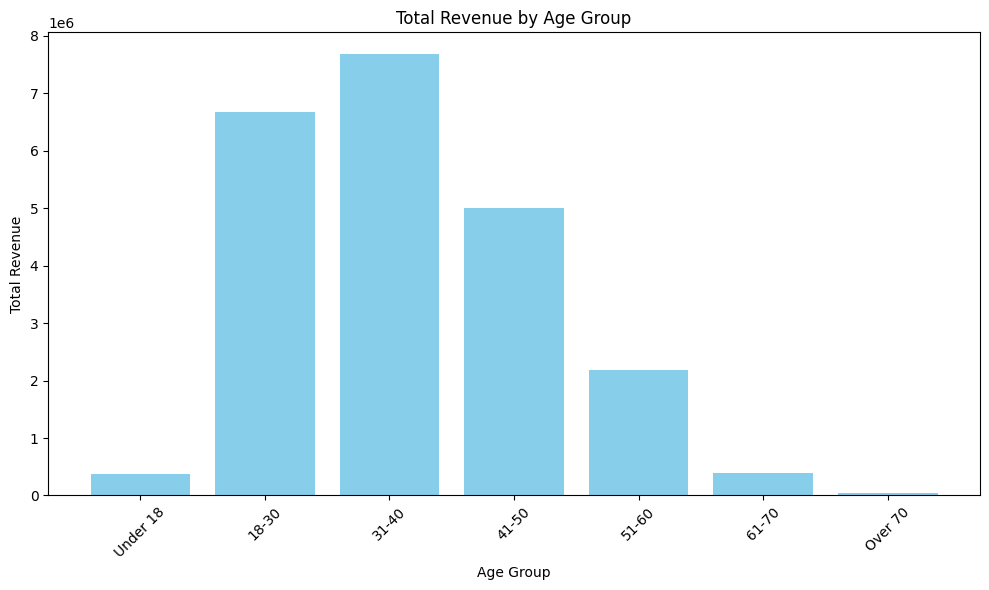

In [50]:
# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 120]
age_labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', '61-70', 'Over 70']

# Create a new column 'Age Group' based on age bins
retail_data['Age Group'] = pd.cut(retail_data['Customer Age'], bins=age_bins, labels=age_labels)

# Group the DataFrame by age group and calculate total revenue for each group
agegroup_revenue = retail_data.groupby('Age Group')['Revenue'].sum()

# Plot bar chart for revenue by age group
plt.figure(figsize=(10, 6))
plt.bar(agegroup_revenue.index, agegroup_revenue.values, color='skyblue')
plt.title('Total Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---


We can further break down the revenue contribution of each age group by analyzing it across different subcategories.


---



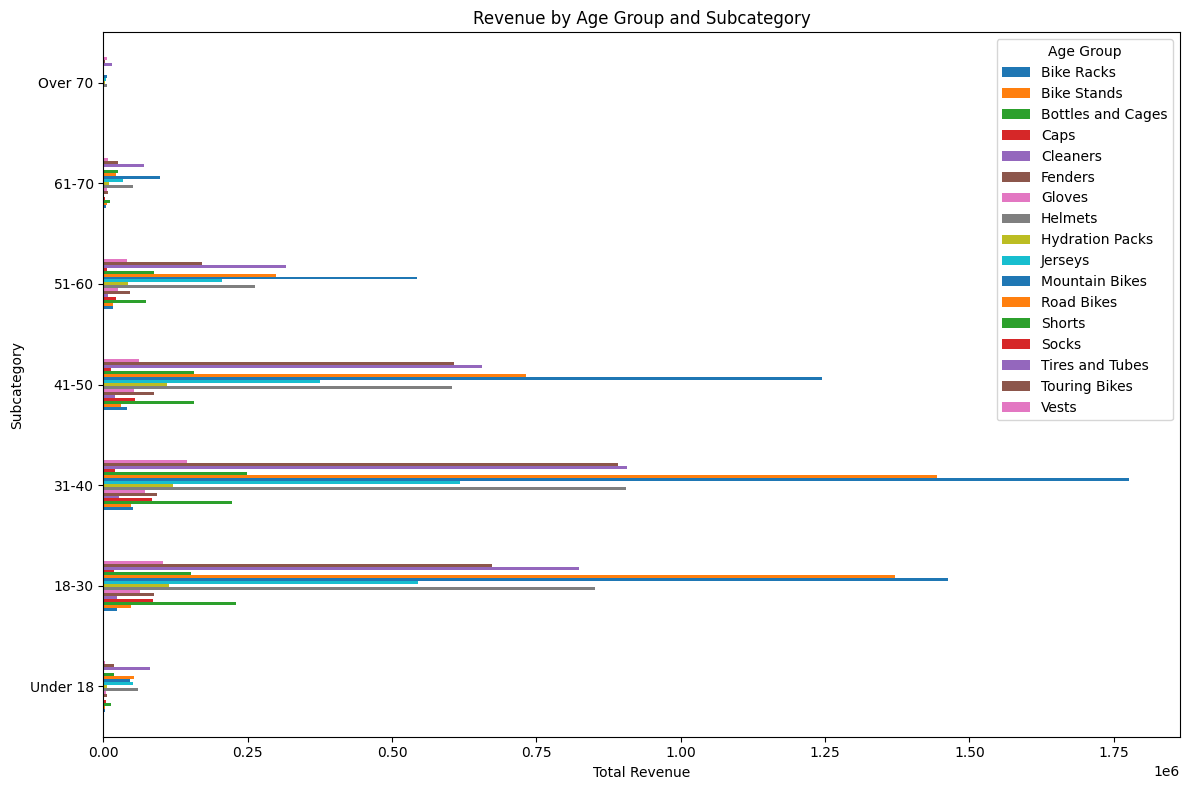

In [49]:
# Define age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 120]
age_labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', '61-70', 'Over 70']

# Create a new column 'Age Group' based on age bins
retail_data['Age Group'] = pd.cut(retail_data['Customer Age'], bins=age_bins, labels=age_labels)

# Group the DataFrame by age group and subcategory, then calculate total revenue
agegroup_subcategory_revenue = retail_data.groupby(['Age Group', 'Sub Category'])['Revenue'].sum().unstack()

# Plot grouped bar chart for revenue by age group and subcategory
plt.figure(figsize=(12, 8))
agegroup_subcategory_revenue.plot(kind='barh', stacked=False, ax=plt.gca())
plt.title('Revenue by Age Group and Subcategory')
plt.xlabel('Total Revenue')
plt.ylabel('Subcategory')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


The bulk of the revenue originates from individuals aged between 18 and 50.



---


**Sales Trend Analysis**


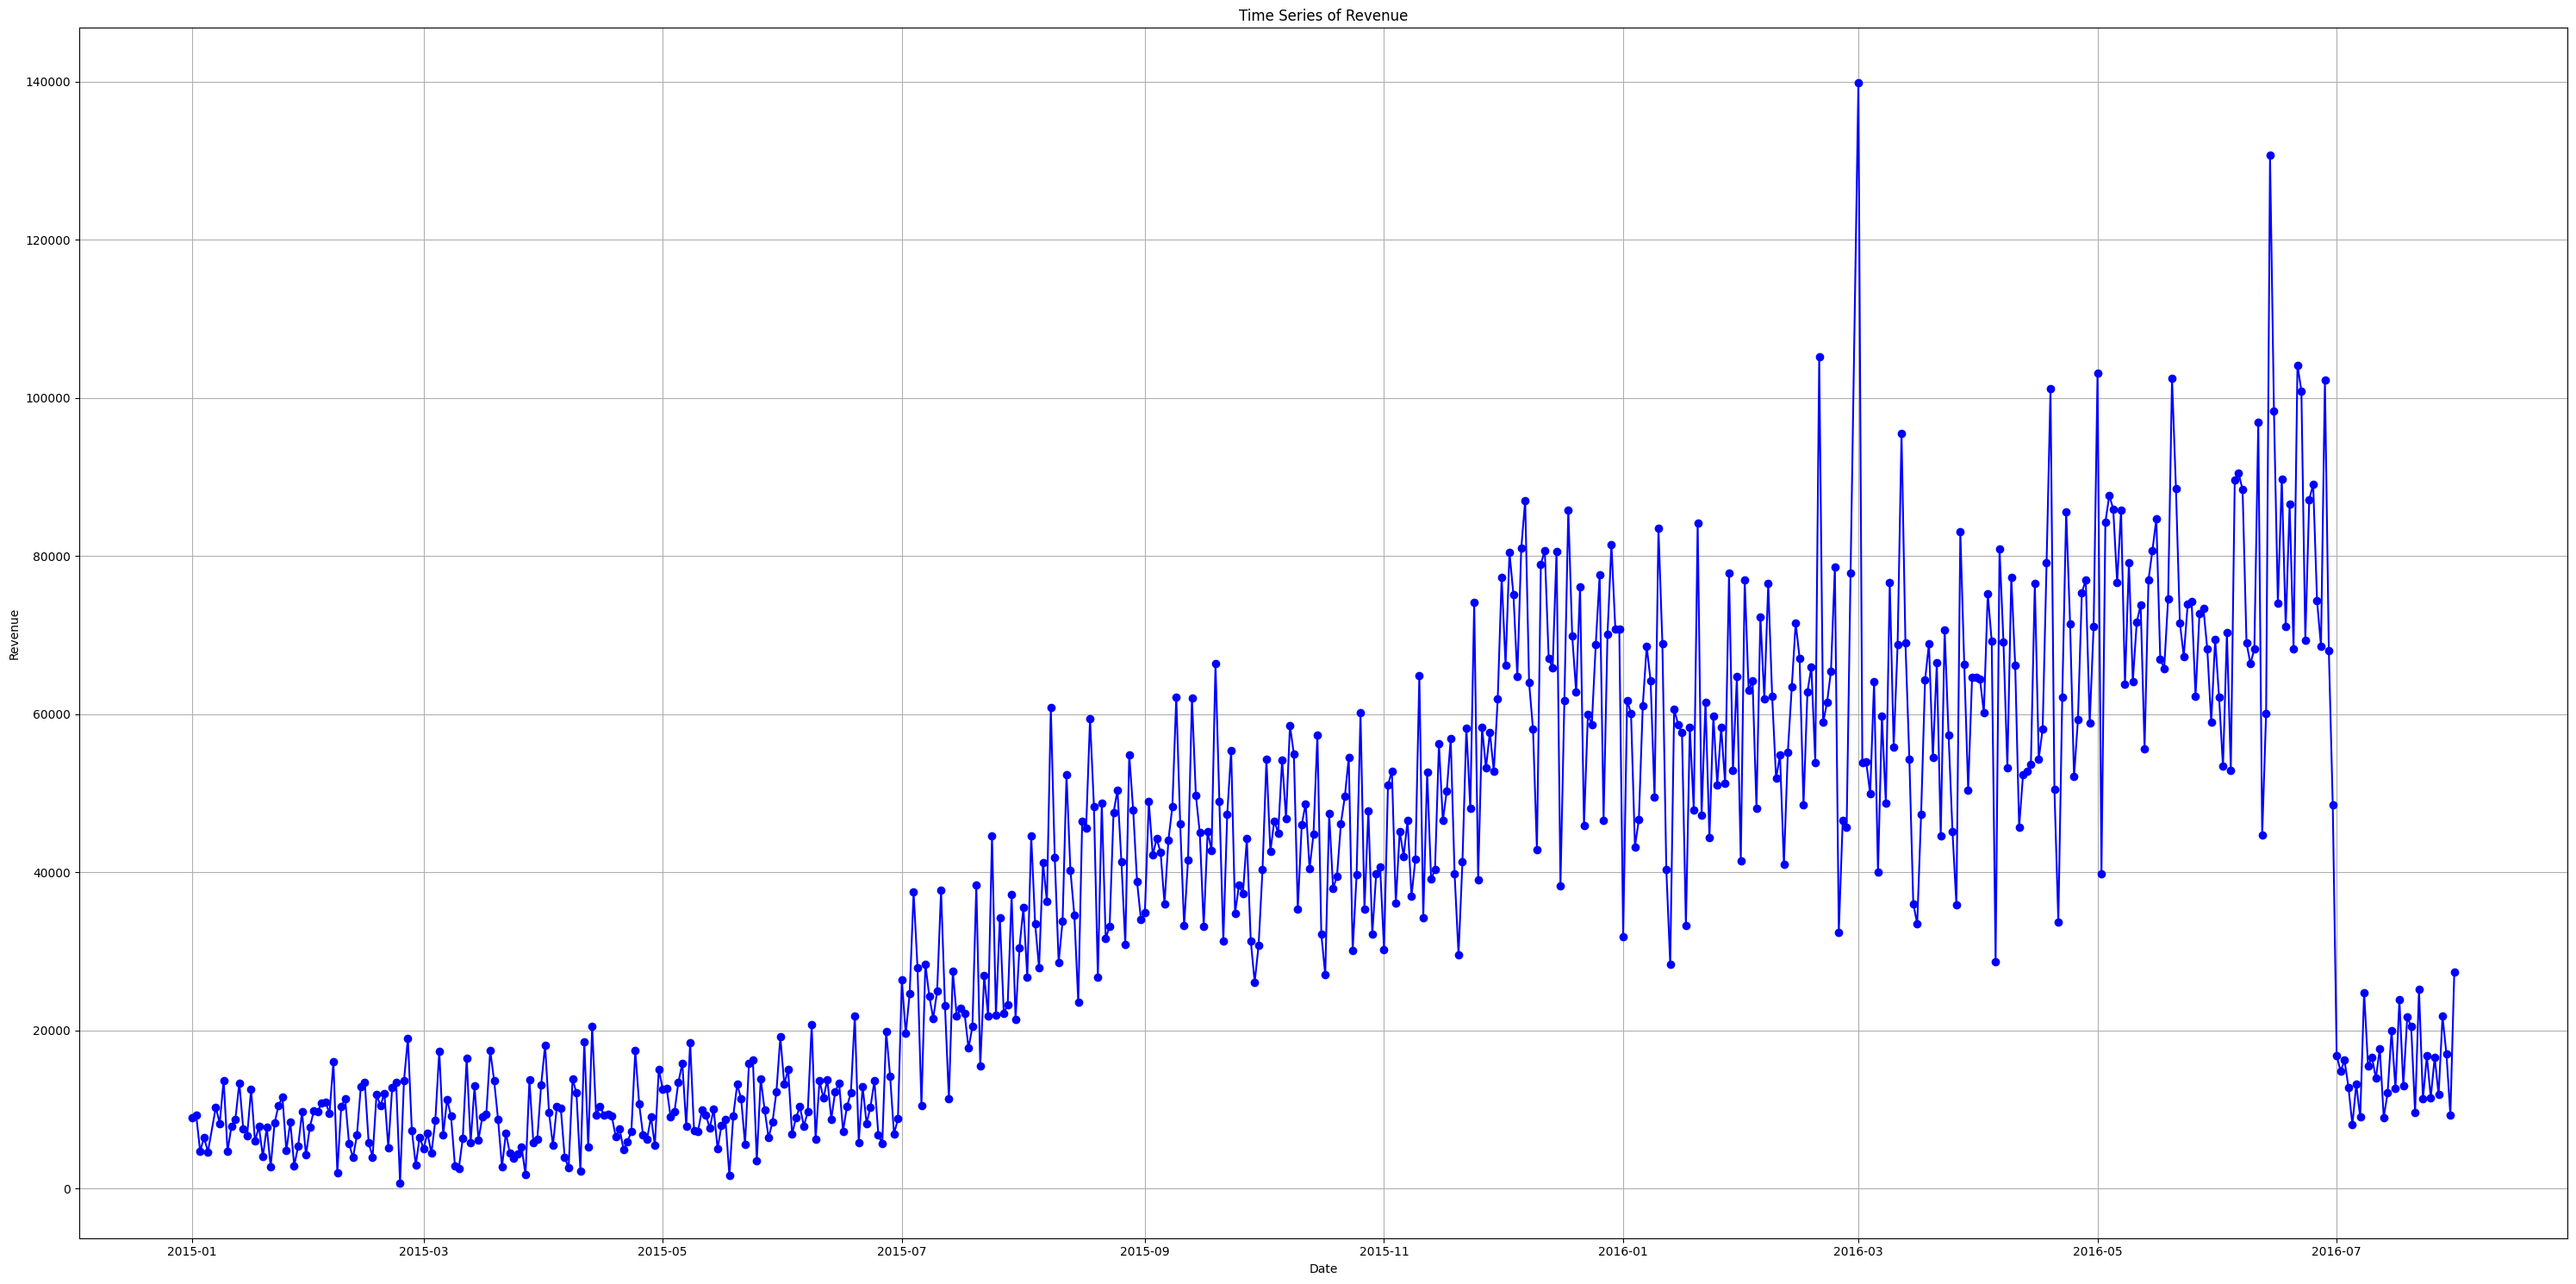

In [70]:
# Convert the 'Date' column to datetime format if it's not already
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Group the data by date and calculate total revenue for each date
daily_revenue = retail_data.groupby('Date')['Revenue'].sum()

# Plot the time series of revenue
plt.figure(figsize=(30, 15))
plt.plot(daily_revenue.index, daily_revenue.values, color='blue', marker='o', linestyle='-')
plt.title('Time Series of Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

Analyzing the time series of revenue, we observe a consistent growth trend commencing from July 2015, followed by a sharp decline in July 2016.


---

Let's explore potential factors contributing to the revenue drop by visualizing the total sales for each subcategory before and after July 2016, the period when the revenue declined

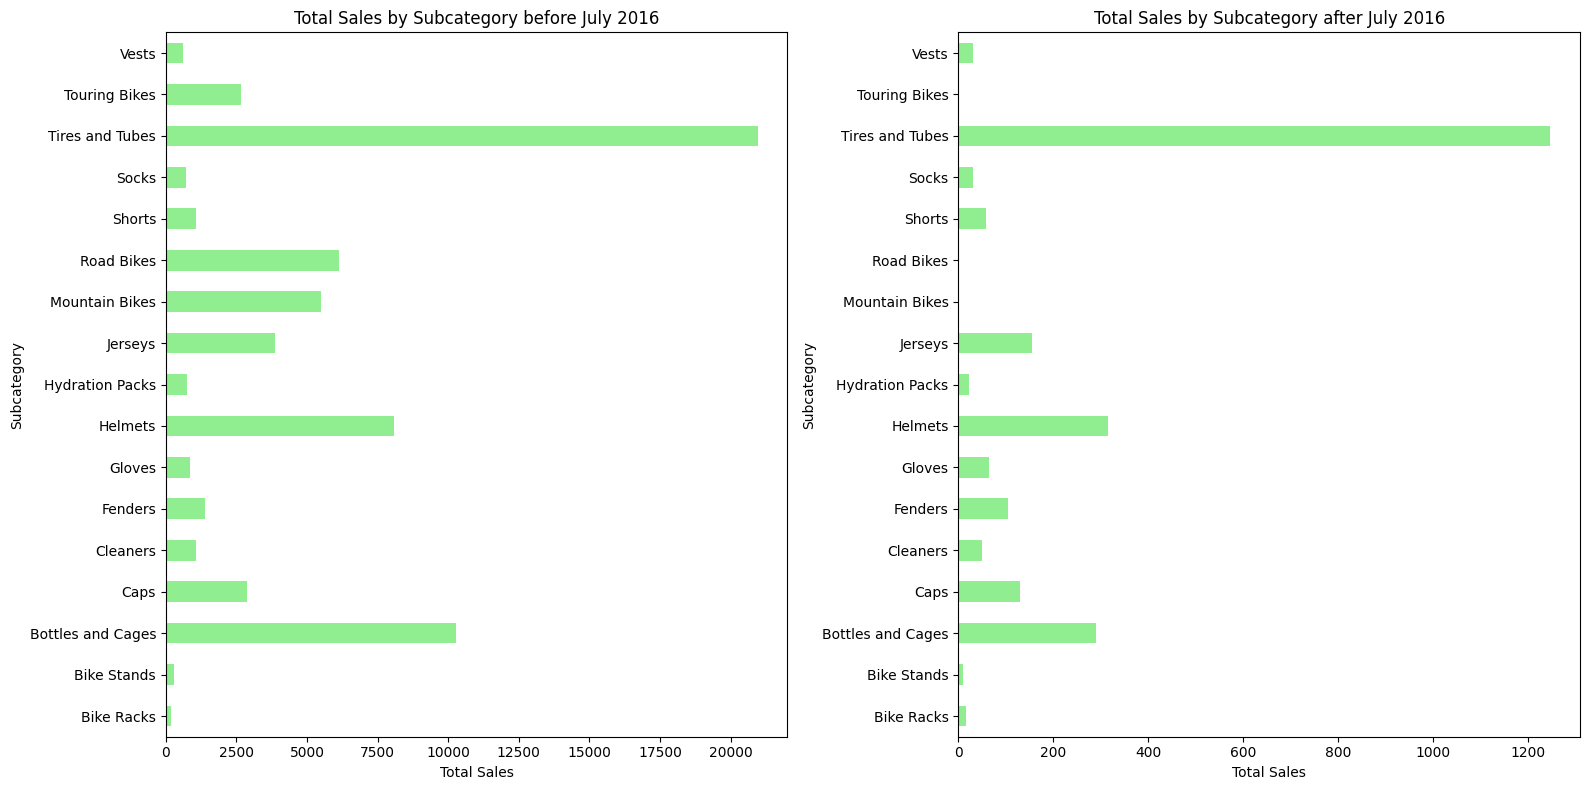

In [86]:
# Convert the 'Date' column to datetime format if it's not already
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Filter data for sales after July 2016
sales_after_2016_07 = retail_data[retail_data['Date'] > '2016-07']

# Group the filtered data by subcategory and calculate total sales
sales_after_2016_07_by_subcategory = sales_after_2016_07.groupby('Sub Category')['Quantity'].sum()

# Filter data for sales before July 2016
sales_before_2016_07 = retail_data[retail_data['Date'] <= '2016-07']

# Group the filtered data by subcategory and calculate total sales
sales_before_2016_07_by_subcategory = sales_before_2016_07.groupby('Sub Category')['Quantity'].sum()

# Merge sales data and fill missing values with zeros
merged_sales = pd.merge(sales_before_2016_07_by_subcategory, sales_after_2016_07_by_subcategory,
                        left_index=True, right_index=True, how='outer', suffixes=('_before', '_after')).fillna(0)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot bar chart for sales before July 2016
merged_sales['Quantity_before'].plot(kind='barh', color='lightgreen', ax=axes[0])
axes[0].set_title('Total Sales by Subcategory before July 2016')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Subcategory')

# Plot bar chart for sales after July 2016
merged_sales['Quantity_after'].plot(kind='barh', color='lightgreen', ax=axes[1])
axes[1].set_title('Total Sales by Subcategory after July 2016')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('Subcategory')

plt.tight_layout()
plt.show()

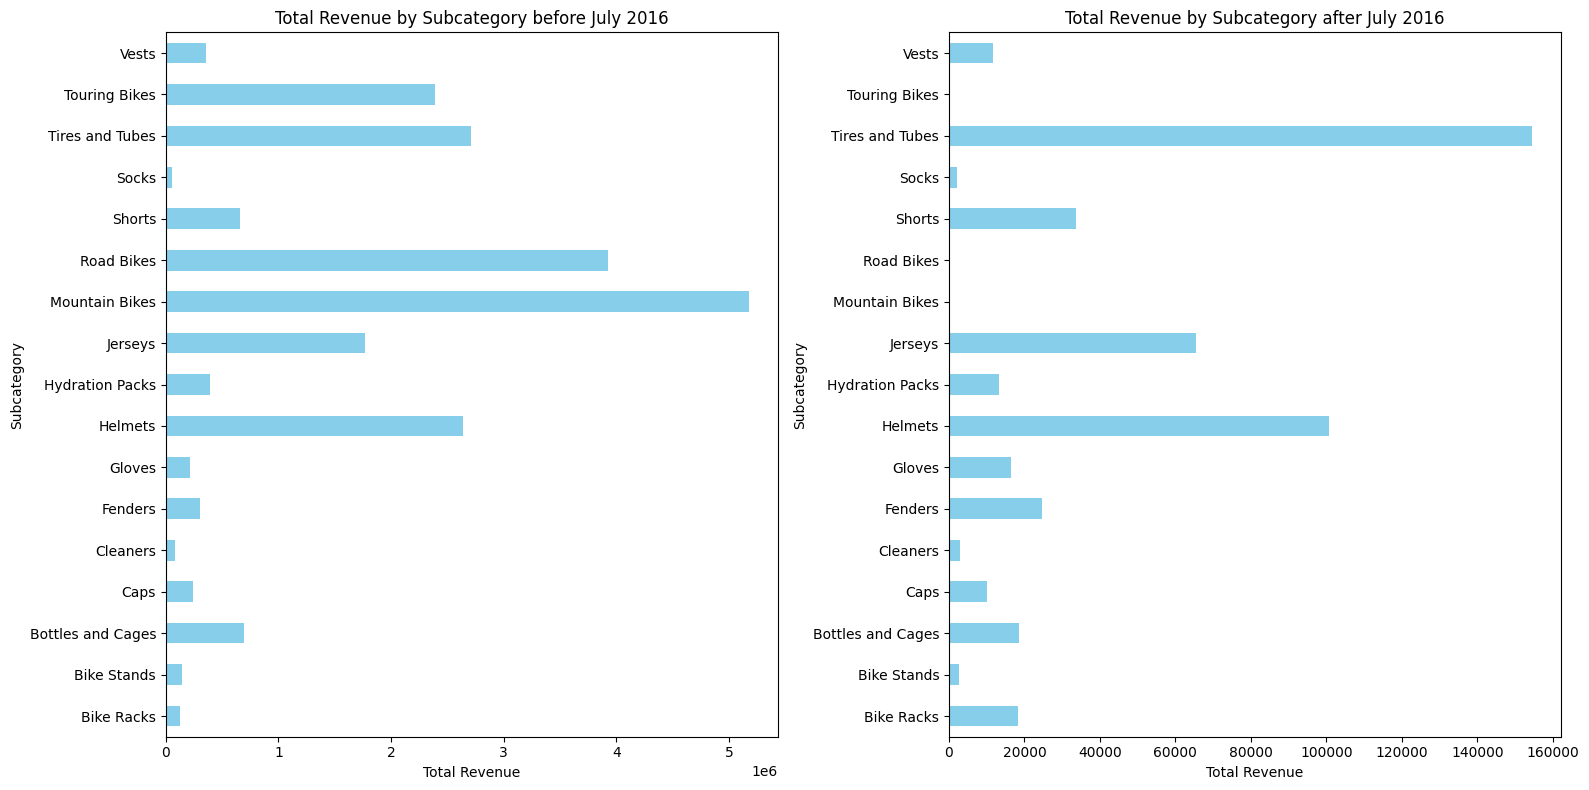

In [87]:
# Convert the 'Date' column to datetime format if it's not already
retail_data['Date'] = pd.to_datetime(retail_data['Date'])

# Filter data for revenue after July 2016
revenue_after_2016_07 = retail_data[retail_data['Date'] > '2016-07']

# Group the filtered data by subcategory and calculate total revenue
revenue_after_2016_07_by_subcategory = revenue_after_2016_07.groupby('Sub Category')['Revenue'].sum()

# Filter data for revenue before July 2016
revenue_before_2016_07 = retail_data[retail_data['Date'] <= '2016-07']

# Group the filtered data by subcategory and calculate total revenue
revenue_before_2016_07_by_subcategory = revenue_before_2016_07.groupby('Sub Category')['Revenue'].sum()

# Merge revenue data and fill missing values with zeros
merged_revenue = pd.merge(revenue_before_2016_07_by_subcategory, revenue_after_2016_07_by_subcategory,
                          left_index=True, right_index=True, how='outer', suffixes=('_before', '_after')).fillna(0)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot bar chart for revenue before July 2016
merged_revenue['Revenue_before'].plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_title('Total Revenue by Subcategory before July 2016')
axes[0].set_xlabel('Total Revenue')
axes[0].set_ylabel('Subcategory')

# Plot bar chart for revenue after July 2016
merged_revenue['Revenue_after'].plot(kind='barh', color='skyblue', ax=axes[1])
axes[1].set_title('Total Revenue by Subcategory after July 2016')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('Subcategory')

plt.tight_layout()
plt.show()

The significant decrease in sales of Mountain and Road Bikes, previously our primary revenue sources, likely contributed to the decline in revenue


---

Let's examine which countries are responsible for the distribution of revenue.

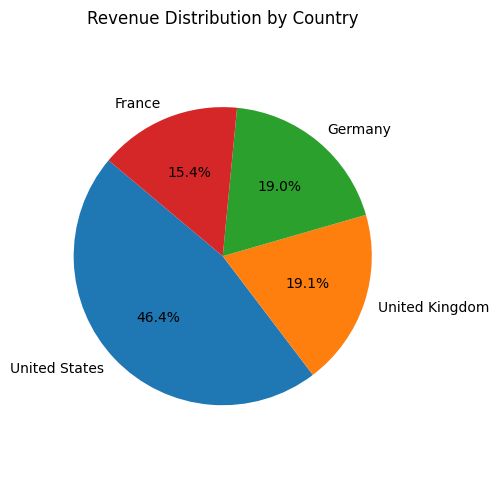

In [79]:

# Group the data by country and calculate total revenue for each country
country_revenue = retail_data.groupby('Country')['Revenue'].sum()

# Sort the countries by revenue in descending order
country_revenue = country_revenue.sort_values(ascending=False)

# Plot pie chart for revenue by country
plt.figure(figsize=(7, 7))
plt.pie(country_revenue, labels=country_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()



---


Most of revenue is generated by selling products in United States, followed by United Kingdom and Germany with France being last in total Revenue.


---
# Conclusion:

In this data project, we set out to achieve several goals aimed at exploring sales trends, understanding customer demographics, optimizing sales strategies, and enhancing pricing strategies to inform business decisions. Through comprehensive analysis of the sales data, we gained valuable insights that can guide strategic decision-making.


---



Revenue Analysis:
Bikes emerged as the top revenue-generating category, while clothing contributed the least. Within the bike category, Road Bikes and Mountain Bikes stood out as the primary revenue drivers, followed by Helmets, Tires and Tubes, and Touring Bikes. The discrepancy between revenue and sales quantity, particularly notable in the case of Tires and Tubes, underscores the importance of considering unit cost and profit margins in sales analysis.
Customer Demographics:
Examination of customer demographics revealed that gender does not significantly influence purchasing behavior, as both genders contribute similarly to revenue across various product subcategories. However, analyzing revenue distribution among different age groups highlighted the importance of targeting individuals aged between 18 and 50, who account for the bulk of revenue generation.
Sales Trends:
Time series analysis unveiled a consistent growth trend in revenue from July 2015 onwards, followed by a sharp decline in July 2016. The decline in revenue can be attributed to a significant decrease in sales of Mountain and Road Bikes, previously primary revenue sources, indicating a need for strategic adjustments in sales and marketing strategies.
Geographic Insights:
The analysis revealed that the majority of revenue is generated from sales in the United States, followed by the United Kingdom and Germany, with France ranking lowest in total revenue. This insight underscores the importance of localized marketing and sales strategies tailored to specific geographic regions.
By achieving these project goals, we have equipped the business with valuable insights to inform strategic decisions across sales, marketing, and pricing strategies. Moving forward, leveraging these insights can drive targeted efforts to optimize sales performance, enhance customer engagement, and ultimately maximize revenue and profitability.